# Análise do valor do coeficiente de dice

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'


## Calcula dice

In [2]:
def dice(y_pred, y_true, k = 1):
    intersection = np.sum(y_pred[y_true==k]) * 2.0
    dice_score = intersection / (np.sum(y_pred) + np.sum(y_true))
    return dice_score


## Teste

In [3]:
def plot_2_img(img_1, img_2):
    fig, ax = plt.subplots(1, 2)

    # https://github.com/matplotlib/matplotlib/issues/25468
    ax[0].imshow(img_1, vmin=0, vmax=255)
    #ax[0].set_xlabel("img_1")

    ax[1].imshow(img_2, vmin=0, vmax=255)
    #ax[1].set_xlabel("img_2")


In [4]:
def img_pr_mask(img):
    img = img / 255.0
    img = np.array(img)

    #print(img.shape)
    #img = img[:,:, 0] # imread IMREAD_GRAYSCALE
    #print(img.shape)

    img[img >= 0.5] = 1
    img[img < 1] = 0
    img = img.astype('uint8')

    return img


In [5]:
def calc_dice(img_1, img_2):
    img_pr = img_pr_mask(img_1)
    img_mask = img_pr_mask(img_2)

    dice_score = dice(img_pr, img_mask, k = 1) # k can be 255 or 1
    dice_score = round(dice_score, 3)
    print(f"Dice {dice_score}")

    return dice_score


In [6]:
size_img = 100
#size_img = 256

step_size = 1 # 0 to 100, 1 step
#step_size = 5 # 0 to 100, 5 step

img_1 = np.zeros((size_img, size_img)) # All 0
img_1 = img_1.astype(np.uint8)

img_2 = np.full((size_img, size_img), 255) # All 255
img_2 = img_2.astype(np.uint8)

print(f"Quantidade de pixel: {size_img * size_img}")
values = []

for step in range(0, size_img + 1, step_size):
    x = step
    y = x
    percentage = ((x * size_img)/(size_img * size_img) * 100)
    percentage = round(percentage, 2)

    print(f"{step} - qtd pixel: {x * size_img} - {percentage} % ", end="")

    for i in range (x):
        for j in range (size_img):
            #print(f"img_1[{i}, {j}] = 255")
            img_1[i, j] = 255

    img_2 = img_2.astype(np.uint8)

    dice_score = calc_dice(img_1, img_2)
    values.append((percentage, dice_score))

    if step_size >= 5:
        plot_2_img(img_1, img_2)


Quantidade de pixel: 10000
0 - qtd pixel: 0 - 0.0 % Dice 0.0
1 - qtd pixel: 100 - 1.0 % Dice 0.02
2 - qtd pixel: 200 - 2.0 % Dice 0.039
3 - qtd pixel: 300 - 3.0 % Dice 0.058
4 - qtd pixel: 400 - 4.0 % Dice 0.077
5 - qtd pixel: 500 - 5.0 % Dice 0.095
6 - qtd pixel: 600 - 6.0 % Dice 0.113
7 - qtd pixel: 700 - 7.0 % Dice 0.131
8 - qtd pixel: 800 - 8.0 % Dice 0.148
9 - qtd pixel: 900 - 9.0 % Dice 0.165
10 - qtd pixel: 1000 - 10.0 % Dice 0.182
11 - qtd pixel: 1100 - 11.0 % Dice 0.198
12 - qtd pixel: 1200 - 12.0 % Dice 0.214
13 - qtd pixel: 1300 - 13.0 % Dice 0.23
14 - qtd pixel: 1400 - 14.0 % Dice 0.246
15 - qtd pixel: 1500 - 15.0 % Dice 0.261
16 - qtd pixel: 1600 - 16.0 % Dice 0.276
17 - qtd pixel: 1700 - 17.0 % Dice 0.291
18 - qtd pixel: 1800 - 18.0 % Dice 0.305
19 - qtd pixel: 1900 - 19.0 % Dice 0.319
20 - qtd pixel: 2000 - 20.0 % Dice 0.333
21 - qtd pixel: 2100 - 21.0 % Dice 0.347
22 - qtd pixel: 2200 - 22.0 % Dice 0.361
23 - qtd pixel: 2300 - 23.0 % Dice 0.374
24 - qtd pixel: 2400 - 24

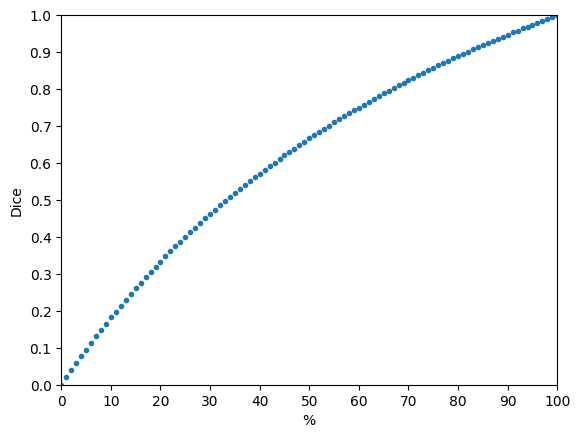

In [7]:
def plot_values_dice(values):
    x_data = [x[0] for x in values]
    y_data = [y[1] for y in values]

    plt.xlim(0, 100)
    plt.ylim(0, 1)

    #plt.plot(x_data, y_data)
    plt.plot(x_data, y_data, marker='.', linestyle='None')

    plt.xticks(np.arange(0, 100+1, 10))
    plt.yticks(np.arange(0, 1+0.1, 0.1))

    plt.xlabel("%")
    plt.ylabel("Dice")

    plt.show()

plot_values_dice(values)


## Com uma imagem real

img.shape =(256, 256)


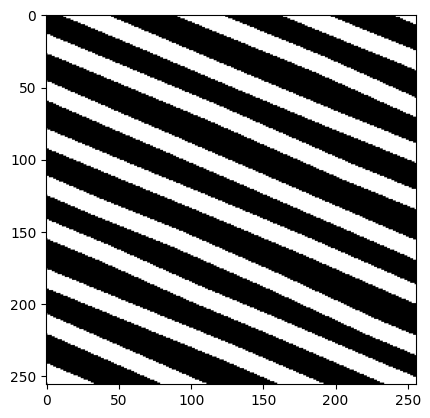

In [8]:
import cv2

img = cv2.imread("A_0001.png", cv2.IMREAD_GRAYSCALE)
print(f"{img.shape =}")
plt.imshow(img, vmin=0, vmax=255)


img_part.shape =(100, 100)


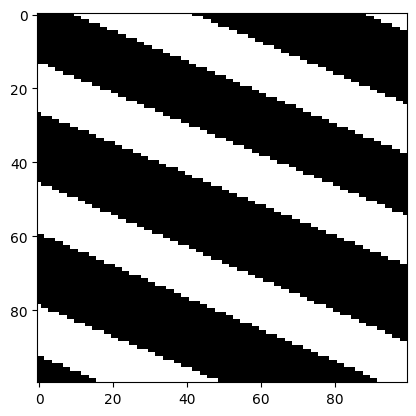

In [9]:
size_part = 100
img_part = img[:size_part, :size_part].copy()
print(f"{img_part.shape =}")
plt.imshow(img_part, vmin=0, vmax=255)


In [10]:
img_part_back = img[:size_part, :size_part].copy()

shape_x = img_part.shape[0]
shape_y = img_part.shape[1]

count_pixel = shape_x * shape_y
print(f"count_pixel {count_pixel}")

values = []
step = 1
for i in range(0, 101, step):
    img_part = img_part_back.copy()

    print(f"i:{i}", end=" ")
    percentage_pixel = i/100
    pixel_to_change = int(count_pixel * percentage_pixel)
    
    count = 0
    for i in range (shape_x):
        for j in range (shape_y):
            if count == pixel_to_change:
                break
            else:
                count = count + 1
                #print(f"{count}")

            #print(f"before: img_1[{i}, {j}] = {img_part[i, j]}")
            if img_part[i, j] == 0:
                img_part[i, j] = 255
            else:
                img_part[i, j] = 0
            #print(f"After: img_1[{i}, {j}] = {img_part[i, j]}")

        if count == pixel_to_change:
            print(f"percentage changed: {percentage_pixel} - pixel end: {count}", end=" ")
            break

    #plot_2_img(img[:size_part, :size_part], img_part)
    dice_score = calc_dice(img_part_back, img_part)
    values.append((100 - int(percentage_pixel * 100), dice_score))
    #print(f"Dice: {dice_score}")


count_pixel 10000
i:0 percentage changed: 0.0 - pixel end: 0 Dice 1.0
i:1 percentage changed: 0.01 - pixel end: 100 Dice 0.988
i:2 percentage changed: 0.02 - pixel end: 200 Dice 0.976
i:3 percentage changed: 0.03 - pixel end: 300 Dice 0.965
i:4 percentage changed: 0.04 - pixel end: 400 Dice 0.953
i:5 percentage changed: 0.05 - pixel end: 500 Dice 0.941
i:6 percentage changed: 0.06 - pixel end: 600 Dice 0.93
i:7 percentage changed: 0.07 - pixel end: 700 Dice 0.919
i:8 percentage changed: 0.08 - pixel end: 800 Dice 0.907
i:9 percentage changed: 0.09 - pixel end: 900 Dice 0.896
i:10 percentage changed: 0.1 - pixel end: 1000 Dice 0.885
i:11 percentage changed: 0.11 - pixel end: 1100 Dice 0.874
i:12 percentage changed: 0.12 - pixel end: 1200 Dice 0.863
i:13 percentage changed: 0.13 - pixel end: 1300 Dice 0.852
i:14 percentage changed: 0.14 - pixel end: 1400 Dice 0.842
i:15 percentage changed: 0.15 - pixel end: 1500 Dice 0.831
i:16 percentage changed: 0.16 - pixel end: 1600 Dice 0.82
i:17 pe

In [11]:
values


[(100, 1.0),
 (99, 0.988),
 (98, 0.976),
 (97, 0.965),
 (96, 0.953),
 (95, 0.941),
 (94, 0.93),
 (93, 0.919),
 (92, 0.907),
 (91, 0.896),
 (90, 0.885),
 (89, 0.874),
 (88, 0.863),
 (87, 0.852),
 (86, 0.842),
 (85, 0.831),
 (84, 0.82),
 (83, 0.809),
 (82, 0.799),
 (81, 0.788),
 (80, 0.777),
 (79, 0.765),
 (78, 0.754),
 (77, 0.743),
 (76, 0.731),
 (75, 0.719),
 (74, 0.708),
 (73, 0.696),
 (72, 0.684),
 (72, 0.672),
 (70, 0.661),
 (69, 0.649),
 (68, 0.638),
 (67, 0.627),
 (66, 0.616),
 (65, 0.606),
 (64, 0.595),
 (63, 0.585),
 (62, 0.576),
 (61, 0.566),
 (60, 0.557),
 (59, 0.547),
 (58, 0.538),
 (57, 0.529),
 (56, 0.52),
 (55, 0.511),
 (54, 0.502),
 (53, 0.493),
 (52, 0.484),
 (51, 0.474),
 (50, 0.465),
 (49, 0.455),
 (48, 0.444),
 (47, 0.434),
 (46, 0.424),
 (45, 0.413),
 (44, 0.401),
 (44, 0.391),
 (43, 0.379),
 (41, 0.368),
 (40, 0.357),
 (39, 0.346),
 (38, 0.336),
 (37, 0.326),
 (36, 0.316),
 (35, 0.306),
 (34, 0.298),
 (33, 0.289),
 (32, 0.281),
 (31, 0.273),
 (30, 0.266),
 (29, 0.25

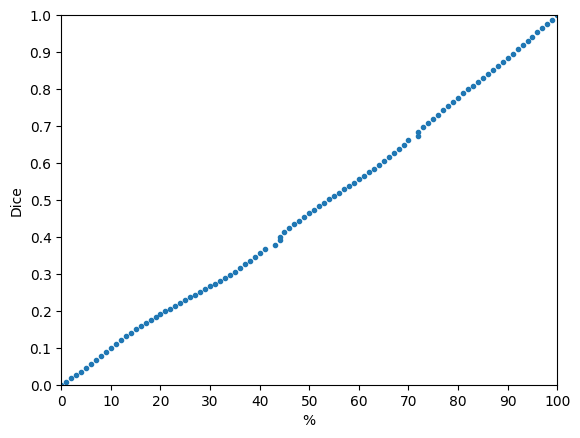

In [12]:
plot_values_dice(values)
